# *Elements of Statistical Learning* - Exercise 3.2

> **Author**: Lorenzo BATTARRA
>
> **Last reviewed**: 2019/01/02

## 0. Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats as sts
import scipy as sp

from matplotlib.patches import Rectangle, Circle
from matplotlib.collections import PatchCollection

In [19]:
# matplotlib styling

#plt.style.available[:20]
plt.style.use('ggplot')

In [20]:
#Add `pyesl` path

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

from pyesl.esl_helpers import plt_style

In [21]:
data_dir = '../../Data/'

## 1. Figure showing the difference in confidence bands

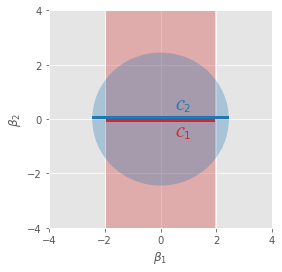

In [22]:
figWidth = 4
figHeight = 4
fig = plt.figure(figsize=(figWidth,figHeight))
ax = fig.add_subplot(111)

chi1 = np.sqrt(sts.chi2.ppf(0.95, 1, loc=0, scale=1))
chi2 = np.sqrt(sts.chi2.ppf(0.95, 2, loc=0, scale=1))

r1 = Rectangle((-chi1, -4), width = 2 * chi1, height = 8)
r2 = Circle((0, 0), radius = chi2)

b1 = Rectangle((-chi1, -0.1), width = 2 * chi1, height = 0.1)
b2 = Rectangle((-chi2, 0), width = 2 * chi2, height = 0.1)

p1 = PatchCollection([r1], facecolor='tab:red', edgecolor='None', alpha=0.3)
p2 = PatchCollection([r2], facecolor='tab:blue', edgecolor='None', alpha=0.3)

q1 = PatchCollection([b1], facecolor='tab:red', edgecolor='None', alpha=1.0)
q2 = PatchCollection([b2], facecolor='tab:blue', edgecolor='None', alpha=1.0)

ax.add_collection(p1)
ax.add_collection(p2)
ax.add_collection(q1)
ax.add_collection(q2)

ax.set_xticks(np.arange(-4, 4.01, 2.0))
ax.set_yticks(np.arange(-4, 4.01, 2.0))

ax.set_xlabel(r"$\beta _1$")
ax.set_ylabel(r'$\beta_2$')

ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])

ax.text(0.8,-0.5,"$\mathcal{C}_1$", size=15, ha="center", va="center", color='tab:red')
ax.text(0.8, 0.5, "$\mathcal{C}_2$", size=15, ha="center", va="center", color='tab:blue')

ax.grid(True, which='both')
plt.show()

#ax.get_figure().savefig(str(Path(os.getcwd()).parent.parent) + '/ESLExLatex/Figures/E3p2_A.pdf', bbox_inches='tight', pad_inches = 0)

> The two areas have the same total probability under a 2d unit norm centered gaussian, but they correspond to different intervals for $\beta_1$

## 2. Example on a polynomial of degree 3

> - $X$ uniformly distributed between $-1$ and $1$
> - $Y = \beta_0 + \beta_1\, X + \beta_2\, X^2 + \beta_3\, X^3 + \sigma\, \epsilon$:
>   - $\beta_i$ sampled from unit norm centered normal
>   - $\epsilon$ unit normal centered normal

In [23]:
# example:
np.random.seed(0)

beta = np.random.randn(4)
sigma = 0.5
N = 30
p = 3
X_1 = np.random.uniform(low = -1.0, high = 1.0, size = N)

X = np.ones((N, 4))
for k in range(1, 4):
    X[:,k] = X[:,k - 1] * X_1
    
Y = np.dot(X, beta) + sigma * np.random.randn(N)

> Linear regression

In [24]:
betahat = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
Yhat = np.dot(X, betahat)
Yr = Y - Yhat

# sample estimate of residual variance
sigma2hat = np.sum(Yr * Yr) / (N - p - 1)

> Sample points where we estimate confidence interval

In [25]:
x0test = np.arange(start = -1.1, stop = 1.101, step = 0.01)
X0test = np.zeros((x0test.shape[0], 4)) + 1
for k in range(1, 4):
    X0test[:,k] = X0test[:,k - 1] * x0test

In [26]:
# point-wise band
YhatTest = np.dot(X0test, betahat)
chi_1_95 = sts.chi2.ppf(0.95, 1, loc=0, scale=1)
pointBandSide = np.sqrt(chi_1_95 * sigma2hat * np.diag(np.dot(X0test, np.dot(np.linalg.inv(np.dot(X.T, X)), X0test.T))))

In [27]:
# global band
# letting Q be the square root of X^T.X, the confidence interval for beta is:
# || Q (beta - beta_hat) ||^2 <= sigma_hat^2  chi_{p+1}^2 (1 - \alpha)
# This gives rise to a confidence band of size sigma_hat (chi_{p+1}^2 (1 - \alpha))^{1/2} ||Q^{-1} x_0|| on each side of y_0

Q = sp.linalg.sqrtm(np.dot(X.T, X))
X0test_Qm = np.dot(X0test, np.linalg.inv(Q))

chi_4_95 = sts.chi2.ppf(0.95, 4, loc=0, scale=1)

globalBandSide = np.sqrt(sigma2hat * chi_4_95 * np.sum(X0test_Qm * X0test_Qm, axis = 1))

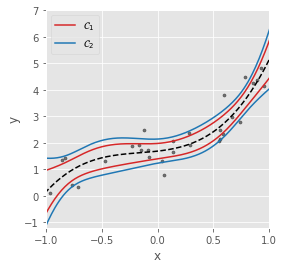

In [28]:
figWidth = 4
figHeight = 4
fig = plt.figure(figsize=(figWidth,figHeight))
ax = fig.add_subplot(111)

ax.scatter(X_1, Y, s = 10, color = 'black', alpha = 0.5)
ax.plot(x0test, YhatTest, color = 'black', **plt_style('dashed'))
ax.plot(x0test, YhatTest + pointBandSide, label=r'$\mathcal{C}_1$', **plt_style('color2'))
ax.plot(x0test, YhatTest - pointBandSide, **plt_style('color2'))
ax.plot(x0test, YhatTest + globalBandSide, label=r'$\mathcal{C}_2$', **plt_style('color1'))
ax.plot(x0test, YhatTest - globalBandSide, **plt_style('color1'))


ax.set_xlabel(r"x")
ax.set_ylabel(r'y')

ax.set_xlim([-1, 1])
ax.set_ylim([-1.2, 7])

ax.grid(True, which='both')
ax.legend()
ax.get_figure().savefig('../../notes/Figures/E3p2_B.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()